In [2]:
import pandas as pd
df_airlines = pd.read_csv('airlines.csv', on_bad_lines='skip')
df_airplanes = pd.read_csv('airplanes.csv', on_bad_lines='skip')
df_airports = pd.read_csv('airports.csv', on_bad_lines='skip')
df_routes =  pd.read_csv('routes.csv', on_bad_lines='skip')

In [51]:
# Join on Source airport
airport_info_1 = df_routes.join(df_airports.set_index('IATA')[['Country']], on='Source airport')

# Rename the column
airport_info_1.rename(columns={'Country': 'Source Country'}, inplace=True)

# Join on Destination airport
airport_info_2 = airport_info_1.join(df_airports.set_index('IATA'), on='Destination airport', rsuffix='_dest')

# Rename the column if needed
airport_info_2.rename(columns={'Country': 'Destination Country'}, inplace=True)

# Drop the additional index columns
airport_info_2 = airport_info_2.reset_index(drop=True)

# Display the resulting DataFrame
airport_info_2[['Source Country', 'Source airport', 'Destination airport', 'Destination Country']]


,Source Country,Source airport,Destination airport,Destination Country
0,Russia,AER,KZN,Russia
1,Russia,ASF,KZN,Russia
2,Russia,ASF,MRV,Russia
3,Russia,CEK,KZN,Russia
4,Russia,CEK,OVB,Russia
...,...,...,...,...
67658,Australia,WYA,ADL,Australia
67659,Russia,DME,FRU,Kyrgyzstan
67660,Kyrgyzstan,FRU,DME,Russia
67661,Kyrgyzstan,FRU,OSS,Kyrgyzstan


In [52]:
#method 3

def display_flights_by_airport(airport: str, internal=False) -> pd.DataFrame :
    """
    Display flights from the given airport.

    Args:
        df (pd.DataFrame): DataFrame containing flight information.
        airport (str): The airport code.
        internal (bool, optional): If True, display only internal flights.
                                   If False, display all flights. Default is False.
    """
    # Filter flights based on the given source airport
    source_flights = airport_info_2[airport_info_2['Source airport'] == airport]

    if internal:
        # Filter for internal flights (destination in the same country)
        source_flights = source_flights[source_flights['Source Country'] == source_flights['Destination Country']]

    # Check if there are any flights to display
    if not source_flights.empty:
        if internal:
            print(f"Internal flights from {airport} to destinations in the same country:")
        else:
            print(f"All flights from {airport}:")

        print(source_flights[['Source Country', 'Source airport', 'Destination airport', 'Destination Country']])
    else:
        print(f"No internal flights.")


# Display all flights from the airport
display_flights_by_airport('CEK')

# Display internal flights from the airport
#display_flights_by_airport(airport_info_2, 'CEK', internal=True)


All flights from CEK:
      Source Country Source airport Destination airport   Destination Country
3             Russia            CEK                 KZN                Russia
4             Russia            CEK                 OVB                Russia
44            Russia            CEK                 OVB                Russia
44402         Russia            CEK                 PRG        Czech Republic
47225         Russia            CEK                 FRU            Kyrgyzstan
47226         Russia            CEK                 OSS            Kyrgyzstan
48482         Russia            CEK                 DME                Russia
48483         Russia            CEK                 DYU            Tajikistan
48484         Russia            CEK                 EVN               Armenia
48485         Russia            CEK                 LBD            Tajikistan
50797         Russia            CEK                 LED                Russia
50798         Russia            CEK       

In [28]:
#method 5

def display_flights_by_country(airport_info_2: pd.DataFrame, country: str, internal=False) -> pd.DataFrame :
    """
    Display flights from the given country.

    Args:
        df (pd.DataFrame): DataFrame containing flight information.
        airport (str): The airport code.
        internal (bool, optional): If True, display only internal flights.
                                   If False, display all flights. Default is False.
    """
    # Filter flights based on the given source country
    source_flights = airport_info_2[airport_info_2['Source Country'] == country]

    if internal:
        # Filter for internal flights (destination in the same country)
        source_flights = source_flights[source_flights['Source Country'] == source_flights['Destination Country']]

    # Check if there are any flights to display
    if not source_flights.empty:
        if internal:
            print(f"Internal flights from {country} to destinations in the same country:")
        else:
            print(f"All flights from {country}:")

        print(source_flights[['Source Country', 'Source airport', 'Destination airport', 'Destination Country']])
    else:
        print(f"No internal flights.")


# Display all flights from a specific country
#display_flights_by_country(airport_info_2, 'Russia')

# Display internal flights a specific country
display_flights_by_country(airport_info_2, 'Russia', internal=True)


Internal flights from Russia to destinations in the same country:
      Source Country Source airport Destination airport Destination Country
0             Russia            AER                 KZN              Russia
1             Russia            ASF                 KZN              Russia
2             Russia            ASF                 MRV              Russia
3             Russia            CEK                 KZN              Russia
4             Russia            CEK                 OVB              Russia
...              ...            ...                 ...                 ...
66231         Russia            EGO                 LED              Russia
66233         Russia            LED                 EGO              Russia
66235         Russia            LED                 VOZ              Russia
66238         Russia            VOZ                 DME              Russia
66240         Russia            VOZ                 LED              Russia

[964 rows x 4 columns

In [5]:
df_airports.head()

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [45]:
airport_info_3 = df_routes.join(df_airports.set_index('IATA')[['Latitude', 'Longitude']], on='Source airport')
# Rename the column
airport_info_3.rename(columns={'Latitude': 'Source Latitude'}, inplace=True)
airport_info_3.rename(columns={'Longitude': 'Source Longitude'}, inplace=True)

# Join on Destination airport
airport_info_4= airport_info_3.join(df_airports.set_index('IATA')[['Latitude', 'Longitude']],  on='Destination airport', rsuffix='_dest')

# Rename the column
airport_info_4.rename(columns={'Latitude': 'Destination Latitude'}, inplace=True)
airport_info_4.rename(columns={'Longitude': 'Destination Longitude'}, inplace=True)

# Drop the additional index columns
airport_info_4 = airport_info_4.reset_index(drop=True)

# Display the resulting DataFrame
airport_distances = airport_info_4[['Source airport', 'Source Latitude','Source Longitude' , 'Destination airport', 'Destination Latitude',  'Destination Longitude']]


In [47]:
airport_distances

,Source airport,Source Latitude,Source Longitude,Destination airport,Destination Latitude,Destination Longitude
0,AER,43.449902,39.956600,KZN,55.606201,49.278702
1,ASF,46.283298,48.006302,KZN,55.606201,49.278702
2,ASF,46.283298,48.006302,MRV,44.225101,43.081902
3,CEK,55.305801,61.503300,KZN,55.606201,49.278702
4,CEK,55.305801,61.503300,OVB,55.012600,82.650703
...,...,...,...,...,...,...
67658,WYA,-33.058899,137.514008,ADL,-34.945000,138.531006
67659,DME,55.408798,37.906300,FRU,43.061298,74.477600
67660,FRU,43.061298,74.477600,DME,55.408798,37.906300
67661,FRU,43.061298,74.477600,OSS,40.609001,72.793297


C:\Users\irene\AppData\Local\Temp\ipykernel_21920\849948178.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = [haversine_distance(src, dest) for src, dest in zip(source_coords, dest_coords)]


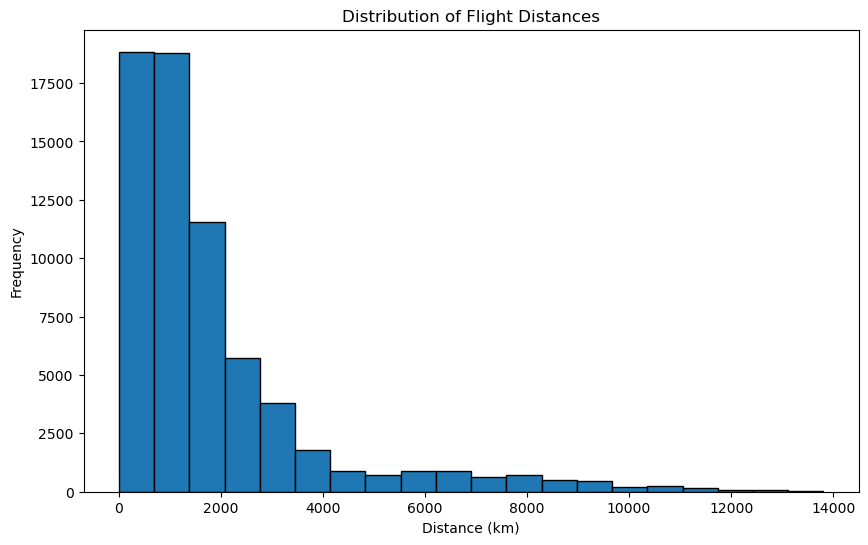

In [55]:
import matplotlib.pyplot as plt
import sys
sys.path.append("./Functions/")
from distances import haversine_distance, Coordinates

def distance_analysis(df):
    """
    Plot the distribution of flight distances for all flights.

    Args:
        df (pd.DataFrame): DataFrame containing flight information.
    """
   
   # Create Coordinates instances for each row
    source_coords = df.apply(lambda row: Coordinates(lat=row['Source Latitude'], lon=row['Source Longitude']), axis=1)
    dest_coords = df.apply(lambda row: Coordinates(lat=row['Destination Latitude'], lon=row['Destination Longitude']), axis=1)

    # Calculate distances for each flight
    df['Distance'] = [haversine_distance(src, dest) for src, dest in zip(source_coords, dest_coords)]

    # Plot the distribution of flight distances
    plt.figure(figsize=(10, 6))
    plt.hist(df['Distance'], bins=20, edgecolor='black')
    plt.title("Distribution of Flight Distances")
    plt.xlabel("Distance (km)")
    plt.ylabel("Frequency")
    plt.show()


distance_analysis(airport_distances)